In [44]:
%load_ext autoreload
%autoreload 2
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [45]:
import px4tools.ulog
import pandas
import os
import pickle
import scipy.interpolate
import px4tools.version

In [46]:
pandas.__version__

'0.19.2'

In [47]:
px4tools.version.git_revision

'7a56b75b62e986c4d832075164ef3d6e22843b6f'

In [51]:
d_gyro = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_gyro',
    processing_func=lambda x: x['sensor_gyro_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_gyro_0.pkl',
    force_processing=False)[:'4 h']

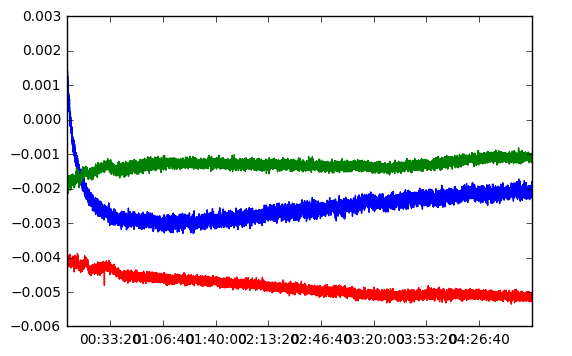

In [52]:
d_gyro.t_sensor_gyro_0__f_x.plot()
d_gyro.t_sensor_gyro_0__f_y.plot()
d_gyro.t_sensor_gyro_0__f_z.plot()

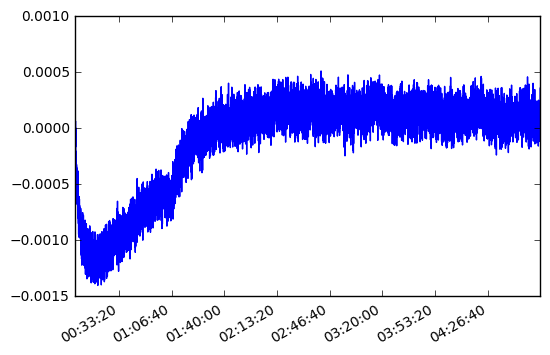

In [98]:
gyro_debiased = (d_gyro.t_sensor_gyro_0__f_x - d_gyro.t_sensor_gyro_0__f_x.ffill().rolling('1 h min').mean().bfill())
gyro_debiased.plot()
gcf().autofmt_xdate()

In [103]:
var = np.sqrt(gyro_debiased['2 h': ].var())
dt = 0.001
sigma_gyro = np.sqrt(var*dt)
sigma_gyro

0.00031978369542952627

In [104]:
np.rad2deg(9.8e-5)

0.0056149863922820677

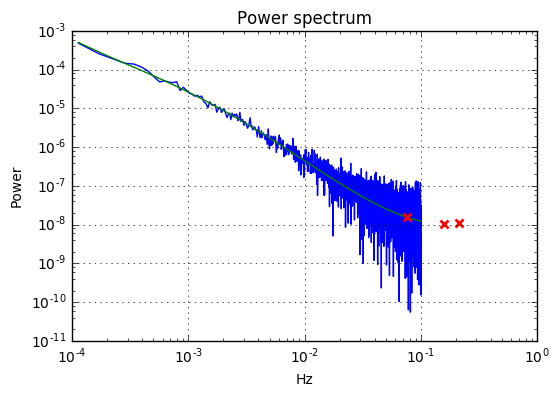

In [68]:
ps_data = px4tools.power_spectrum(d_gyro.t_sensor_gyro_0__f_x, cross_points = (-1, 0, 0.5))

In [8]:
ps_data

{-1: [{'root': 0.00020488104810429363, 'val': 7.7069548078694452e-05}],
 0: [{'root': 0.00234749568274453, 'val': 2.8594280354708559e-05}],
 1: [{'root': 0.081144324716119945, 'val': 0.00012216784313697174}]}

In [27]:
gyro_sigma_np.sqrt(ps_data[0][0]['val'])/2

0.0026736809997973095

In [29]:
ps_data[0][0]['val']**2*2

2.8594280354708559e-05

{'sensor_gyro_0_randomwalk_correlation_time': [2843.3618233354073,
  3799.8812997951936,
  17347.708879408812],
 'sensor_gyro_0_sig_bi': [5.2858992554295259e-05, 0, 2.5840963944894103e-05],
 'sensor_gyro_0_sig_rrw': [1.1969839001707068e-05, 0, 2.1035496366991447e-06],
 'sensor_gyro_0_sig_rw': [9.5435979784304575e-05,
  0.0065408770118048215,
  6.482535300803184e-05],
 'sensor_gyro_0_tau_0': [1.005930845872135,
  10360.949869782004,
  0.18636946293246207],
 'sensor_gyro_0_tau_1': [13.786135182735721, nan, 59.525543781902641],
 'sensor_gyro_0_tau_2': [50.728165038761965, nan, 639.85716894481561]}

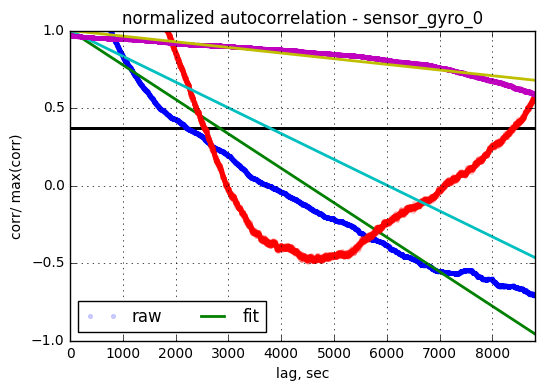

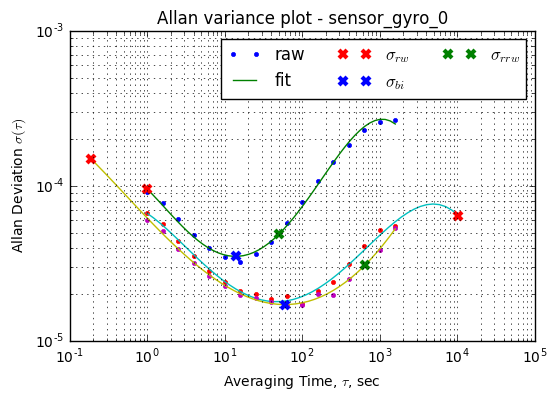

In [9]:
px4tools.ulog.noise_analysis_sensor(
    d_gyro[:'4.99 h'],
    'sensor_gyro_0',
    allan_args={'poly_order':4})

In [10]:
d_accel = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_accel',
    processing_func=lambda x: x['sensor_accel_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_accel_0.pkl',
    force_processing=False)

{'sensor_accel_0_randomwalk_correlation_time': [11243.319675737648,
  9728.6584456964792,
  21092.375925990469],
 'sensor_accel_0_sig_bi': [0.00034363462841840314,
  0.00049840529183490698,
  0.0010079717288875203],
 'sensor_accel_0_sig_rrw': [8.1875811879523461e-06,
  2.3622304492300519e-05,
  0.00013773024907659702],
 'sensor_accel_0_sig_rw': [0.0012569923653104088,
  0.0013975340597254839,
  0.0018761076053909406],
 'sensor_accel_0_tau_0': [3.4577537187323828,
  3.0981831788595127,
  2.6123860977524251],
 'sensor_accel_0_tau_1': [265.91182321922156,
  102.4709506027031,
  23.593318931677189],
 'sensor_accel_0_tau_2': [20449.431474747278,
  3389.1784672612348,
  213.07903096358862]}

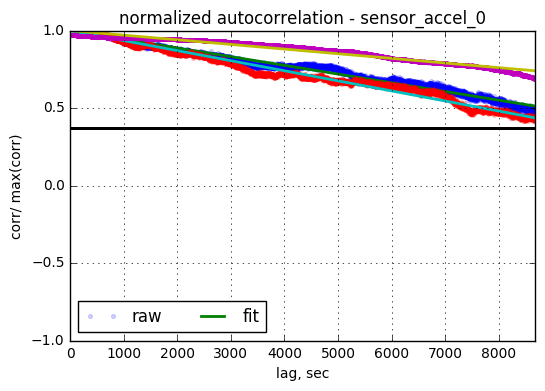

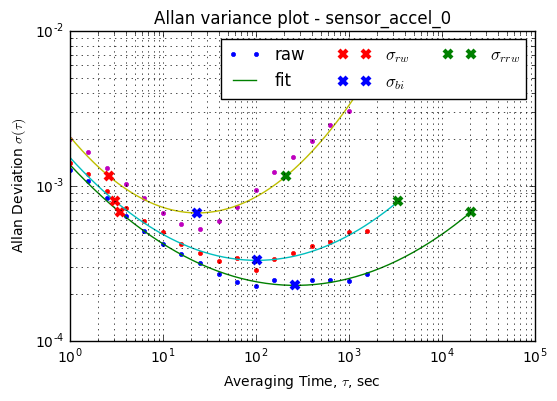

In [11]:
px4tools.ulog.noise_analysis_sensor(
    d_accel[:'4.9 h'],
    'sensor_accel_0',
    allan_args={'poly_order':2})

In [12]:
d_baro = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_baro',
    processing_func=lambda x: x['sensor_baro_0'].resample('100 ms').agg('mean'),
    save_path='./logs/19_19_32-sensor_baro_0.pkl',
    force_processing=False)

{'sig_bi': 0.077206699887699237,
 'sig_rrw': 0.037970096441590433,
 'sig_rw': 0.050906582211857607,
 'tau_0': 0.41799565522738252,
 'tau_1': 2.3221638893189538,
 'tau_2': 12.900720525249318}

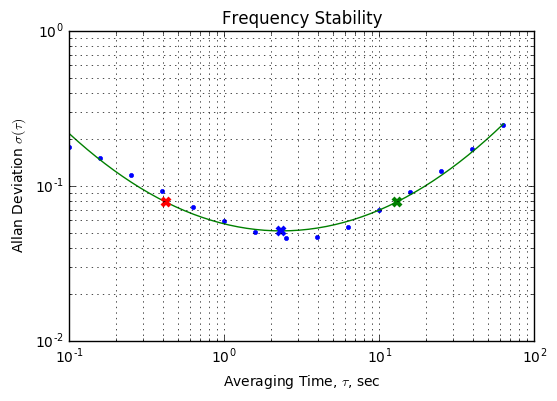

In [13]:
px4tools.ulog.plot_allan_std_dev(d_baro.t_sensor_baro_0__f_altitude,
                                poly_order=2, min_intervals=200)

112414.34288554394

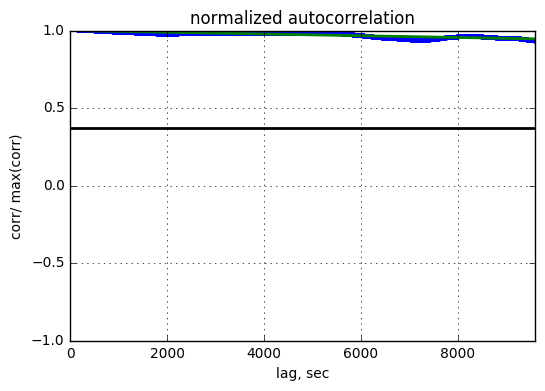

In [14]:
px4tools.ulog.plot_autocorrelation(d_baro.t_sensor_baro_0__f_altitude)

In [15]:
d_mag = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/19_19_32.ulg',
    msg_filter='sensor_mag',
    processing_func=lambda x: x['sensor_mag_0'].resample('1 s').agg('mean'),
    save_path='./logs/19_19_32-sensor_mag_0.pkl',
    force_processing=False)

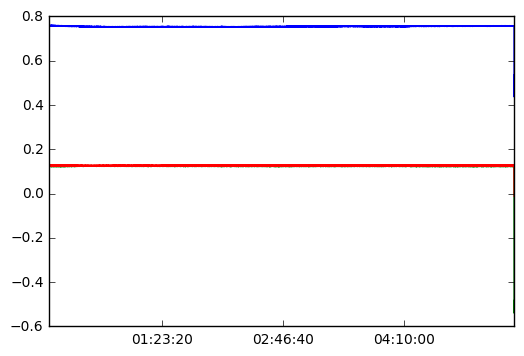

In [16]:
d_mag.t_sensor_mag_0__f_x.plot()
d_mag.t_sensor_mag_0__f_y.plot()
d_mag.t_sensor_mag_0__f_z.plot()

In [17]:
np.sqrt(d_mag.t_sensor_mag_0__f_x**2 + d_mag.t_sensor_mag_0__f_y**2 + d_mag.t_sensor_mag_0__f_z**2).mean()

0.7753296013655869

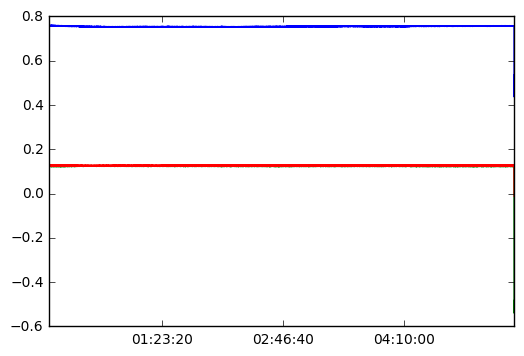

In [18]:
d_mag.t_sensor_mag_0__f_x.plot()
d_mag.t_sensor_mag_0__f_y.plot()
d_mag.t_sensor_mag_0__f_z.plot()

{'sig_bi': 0.00024672417935095616,
 'sig_rrw': 2.5570046490223317e-05,
 'sig_rw': 0.00059633170880164072,
 'tau_0': 4.3388693998998953,
 'tau_1': 40.394014074386973,
 'tau_2': 376.06026424289701}

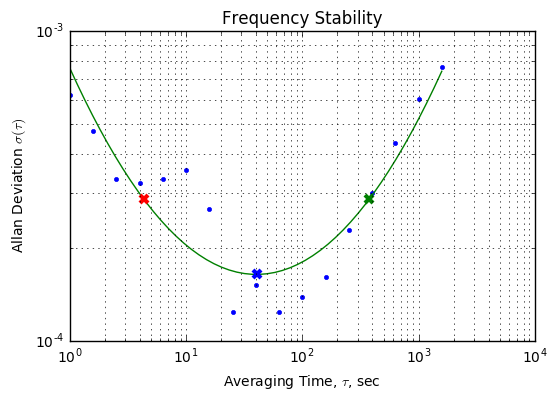

In [19]:
px4tools.ulog.plot_allan_std_dev(d_mag.t_sensor_mag_0__f_x[:'4.99 h'],
                                poly_order=2)

7936.0204451990312

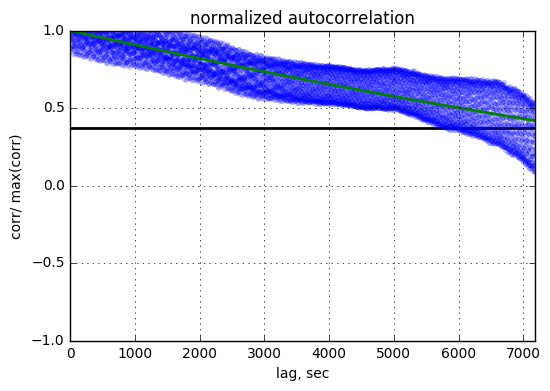

In [20]:
px4tools.ulog.plot_autocorrelation(d_mag.t_sensor_mag_0__f_x['1 h':'4.99 h'],
                                poly_order=2)

In [21]:
d_mag2 = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/logs/01-03-17-mhkabir-pixhawk2.ulg',
    msg_filter='sensor_mag',
    processing_func=lambda x: x['sensor_mag_0'].resample('1 s').agg('mean'),
    save_path='./logs/01-03-17-mhkabir-pixhawk-mag-0.pkl',
    force_processing=False)

{'sig_bi': 0.0011743062910828151,
 'sig_rrw': 5.4582442677059966e-05,
 'sig_rw': 0.0015698664253708597,
 'tau_0': 0.3292636027485018,
 'tau_1': 49.816173049024243,
 'tau_2': 7536.9736482712979}

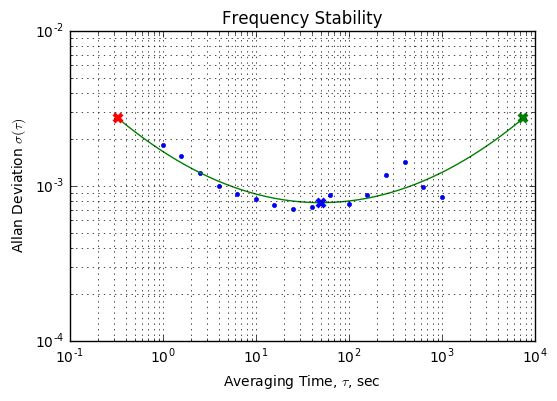

In [22]:
px4tools.ulog.plot_allan_std_dev(d_mag2.t_sensor_mag_0__f_x[:'4.99 h'],
                                poly_order=2)

1105.8831671525481

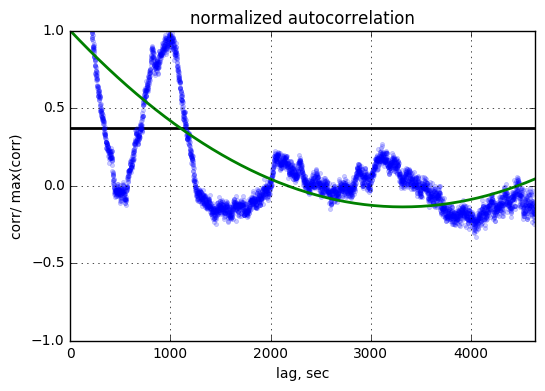

In [23]:
px4tools.ulog.plot_autocorrelation(
    d_mag2.t_sensor_mag_0__f_x['1 h':'4.99 h'], poly_order=2)